In [60]:
import pandas as pd
import numpy as np
import datetime
import random


In [4]:
pip install socrata-py

  Created wheel for socrata-py: filename=socrata_py-1.0.8-py3-none-any.whl size=24729 sha256=84462e7d18ececaf4af51da13ebe5ce6c39e679c34f74c4ef4b46956eaab39a1
  Stored in directory: /Users/jason/Library/Caches/pip/wheels/de/4b/76/6fec86ab5b82b6ec9edb0e75375f53d8750101b3fd5c7653f0
Successfully built socrata-py
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sodapy

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sodapy import Socrata

In [8]:
client = Socrata("data.melbourne.vic.gov.au", None)

In [2]:
import datetime

In [3]:
today = datetime.date.today()
a = print(today)

2021-08-05


In [5]:
datetime.date.today()

datetime.date(2021, 8, 5)

In [25]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)


In [26]:
print(tomorrow)

2021-08-05


In [28]:
tomorrow > today

True

In [31]:
minusmonth = datetime.date.today() - datetime.timedelta(days = 30)

In [32]:
print(minusmonth)

2021-07-05


In [33]:
?datetime.timedelta

Init signature: datetime.timedelta(self, /, *args, **kwargs)
Docstring:     
Difference between two datetime values.

timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0)

All arguments are optional and default to 0.
Arguments may be integers or floats, and may be positive or negative.
File:           ~/opt/anaconda3/lib/python3.7/datetime.py
Type:           type
Subclasses:     _Timedelta


In [257]:
demodata = {'Bay_id': [1001, 1002, 1003, 1004, 1005], 'Status': [0,0,0,0,0], 'Hour': [0,0,0,0,0], 'Minutes': [0, 0, 0, 0, 0], 
           'DayOfWeek': ['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday'], 
            'Date': [today, today, today, today, today]}
demodata = pd.DataFrame(demodata)
demodata

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,0,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04


With this demo data set we need to create 1 weeks worth of data.
First duplicate the minutes 4 times
Then dupilcate Hour 24 times
Then duplicate DayOfWeek and Date 7 times

In [258]:
demodata['Date'] = demodata['Date'].astype('str')
demodata.dtypes

Bay_id        int64
Status        int64
Hour          int64
Minutes       int64
DayOfWeek    object
Date         object
dtype: object

In [259]:
demodata.append([demodata]*3, ignore_index = True)

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,0,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04
5,1001,0,0,0,Wednesday,2021-08-04
6,1002,0,0,0,Wednesday,2021-08-04
7,1003,0,0,0,Wednesday,2021-08-04
8,1004,0,0,0,Wednesday,2021-08-04
9,1005,0,0,0,Wednesday,2021-08-04


In [260]:
#Now that I know how to append I need to change the minutes in increments of 15

demodata.append([demodata], ignore_index = True)

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,0,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04
5,1001,0,0,0,Wednesday,2021-08-04
6,1002,0,0,0,Wednesday,2021-08-04
7,1003,0,0,0,Wednesday,2021-08-04
8,1004,0,0,0,Wednesday,2021-08-04
9,1005,0,0,0,Wednesday,2021-08-04


In [261]:
demodata15 =  {'Minutes': [15,15,15,15,15]}
demodata15 = pd.DataFrame(demodata15)
demodata30 =  {'Minutes': [30,30,30,30,30]}
demodata30 = pd.DataFrame(demodata30)
demodata45 =  {'Minutes': [45,45,45,45,45]}
demodata45 = pd.DataFrame(demodata45)

In [262]:
demodata1 = demodata.append(demodata.assign(Minutes = demodata15['Minutes']), ignore_index = True)
demodata1 = demodata1.append(demodata.assign(Minutes = demodata30['Minutes']), ignore_index = True)
demodata1 = demodata1.append(demodata.assign(Minutes = demodata45['Minutes']), ignore_index = True)

In [263]:
demodata1

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,0,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04
5,1001,0,0,15,Wednesday,2021-08-04
6,1002,0,0,15,Wednesday,2021-08-04
7,1003,0,0,15,Wednesday,2021-08-04
8,1004,0,0,15,Wednesday,2021-08-04
9,1005,0,0,15,Wednesday,2021-08-04


In [264]:
demodata1.append([demodata1]*23, ignore_index = True)

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,0,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
475,1001,0,0,45,Wednesday,2021-08-04
476,1002,0,0,45,Wednesday,2021-08-04
477,1003,0,0,45,Wednesday,2021-08-04
478,1004,0,0,45,Wednesday,2021-08-04


In [265]:
Hour = []


In [266]:
zero = (np.zeros(20)).astype('int')
one = (np.zeros(20)).astype('int') + 1
one = pd.DataFrame(one)
two  = (np.zeros(20)).astype('int') + 2
two = pd.DataFrame(two)
three = (np.zeros(20)).astype('int') + 3
three = pd.DataFrame(three)
four = (np.zeros(20)).astype('int') + 4
four = pd.DataFrame(four)
five = (np.zeros(20)).astype('int') + 5
five = pd.DataFrame(five)
six = (np.zeros(20)).astype('int') + 6
six = pd.DataFrame(six)
seven = (np.zeros(20)).astype('int') + 7
seven = pd.DataFrame(seven)
eight = (np.zeros(20)).astype('int') + 8
eight = pd.DataFrame(eight)
nine = (np.zeros(20)).astype('int') + 9
nine = pd.DataFrame(nine)
ten = (np.zeros(20)).astype('int') + 10
ten = pd.DataFrame(ten)
eleven = (np.zeros(20)).astype('int') + 11
eleven = pd.DataFrame(eleven)
twelve = (np.zeros(20)).astype('int') + 12
twelve = pd.DataFrame(twelve)
thirteen = (np.zeros(20)).astype('int') + 13
thirteen = pd.DataFrame(thirteen)
fourteen = (np.zeros(20)).astype('int') + 14
fourteen = pd.DataFrame(fourteen)
fifteen = (np.zeros(20)).astype('int') + 15
fifteen = pd.DataFrame(fifteen)
sixteen = (np.zeros(20)).astype('int') + 16
sixteen = pd.DataFrame(sixteen)
seventeen = (np.zeros(20)).astype('int') + 17
seventeen = pd.DataFrame(seventeen)
eighteen = (np.zeros(20)).astype('int') + 18
eighteen = pd.DataFrame(eighteen)
nineteen = (np.zeros(20)).astype('int') + 19
nineteen = pd.DataFrame(nineteen)
twenty = (np.zeros(20)).astype('int') + 20
twenty = pd.DataFrame(twenty)
twentyone = (np.zeros(20)).astype('int') + 21
twentyone = pd.DataFrame(twentyone)
twentytwo = (np.zeros(20)).astype('int') + 22
twentytwo = pd.DataFrame(twentytwo)
twentythree = (np.zeros(20)).astype('int') + 23
twentythree = pd.DataFrame(twentythree)

In [267]:
eleven

,0
0,11
1,11
2,11
3,11
4,11
5,11
6,11
7,11
8,11
9,11


In [268]:
demodata2 = demodata1.append(demodata1.assign(Hour = one), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = two), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = three), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = four), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = five), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = six), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = seven), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = eight), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = nine), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = ten), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = eleven), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = twelve), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = thirteen), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = fourteen), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = fifteen), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = sixteen), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = seventeen), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = eighteen), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = nineteen), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = twenty), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = twentyone), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = twentytwo), ignore_index = True)
demodata2 = demodata2.append(demodata1.assign(Hour = twentythree), ignore_index = True)


In [269]:
demodata2

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,0,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
475,1001,0,23,45,Wednesday,2021-08-04
476,1002,0,23,45,Wednesday,2021-08-04
477,1003,0,23,45,Wednesday,2021-08-04
478,1004,0,23,45,Wednesday,2021-08-04


In [270]:
Thursday = ['Thursday']*480
Friday = ['Friday']*480
Saturday = ['Saturday']*480
Sunday = ['Sunday']*480
Monday = ['Monday']*480
Tuesday = ['Tuesday']*480

In [271]:
Thursday1 = datetime.date.today() + datetime.timedelta(days=1)
Friday1 = datetime.date.today() + datetime.timedelta(days=2)
Saturday1 = datetime.date.today() + datetime.timedelta(days=3)
Sunday1 = datetime.date.today() + datetime.timedelta(days=4)
Monday1 = datetime.date.today() + datetime.timedelta(days=5)
Tuesday1 = datetime.date.today() + datetime.timedelta(days=6)

In [272]:
Tuesday1

datetime.date(2021, 8, 10)

In [273]:
demodata3 = demodata2.append(demodata2.assign(DayOfWeek = Thursday, Date = Thursday1), ignore_index = True)
demodata3 = demodata3.append(demodata2.assign(DayOfWeek = Friday, Date = Friday1), ignore_index = True)
demodata3 = demodata3.append(demodata2.assign(DayOfWeek = Saturday, Date = Saturday1), ignore_index = True)
demodata3 = demodata3.append(demodata2.assign(DayOfWeek = Sunday, Date = Sunday1), ignore_index = True)
demodata3 = demodata3.append(demodata2.assign(DayOfWeek = Monday, Date = Monday1), ignore_index = True)
demodata3 = demodata3.append(demodata2.assign(DayOfWeek = Tuesday, Date = Tuesday1), ignore_index = True)

In [274]:
demodata3

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,0,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
3355,1001,0,23,45,Tuesday,2021-08-10
3356,1002,0,23,45,Tuesday,2021-08-10
3357,1003,0,23,45,Tuesday,2021-08-10
3358,1004,0,23,45,Tuesday,2021-08-10


In [275]:
5*4*24*7

3360

In [292]:
import random


In [300]:
RandomNo = []
i = 1
while i <= 3360:
    RandomNo.append(random.randint(0,1))
    i += 1

len(RandomNo)

3360

In [302]:
demodata3['Status'] = RandomNo
demodata3

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,1,0,0,Wednesday,2021-08-04
2,1003,0,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,0,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
3355,1001,0,23,45,Tuesday,2021-08-10
3356,1002,1,23,45,Tuesday,2021-08-10
3357,1003,0,23,45,Tuesday,2021-08-10
3358,1004,0,23,45,Tuesday,2021-08-10


In [307]:
demodata3['Status'] = demodata3['Status'].astype('str')
demodata3.dtypes

Bay_id        int64
Status       object
Hour          int64
Minutes       int64
DayOfWeek    object
Date         object
dtype: object

In [310]:
demodata3['Status'] = demodata3['Status'].replace({'0': 'Unoccupied', '1': 'Present'})
demodata3

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1002,Present,0,0,Wednesday,2021-08-04
2,1003,Unoccupied,0,0,Wednesday,2021-08-04
3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,1005,Unoccupied,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
3355,1001,Unoccupied,23,45,Tuesday,2021-08-10
3356,1002,Present,23,45,Tuesday,2021-08-10
3357,1003,Unoccupied,23,45,Tuesday,2021-08-10
3358,1004,Unoccupied,23,45,Tuesday,2021-08-10


In [311]:
demodata3.to_csv('Dummy_Data.csv')

### Checkpoint

Use the dummy data to create a months worth of data. 

In [48]:
Dummy = pd.read_csv('Dummy_Data.csv', index_col = 0)
Dummy

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1002,Present,0,0,Wednesday,2021-08-04
2,1003,Unoccupied,0,0,Wednesday,2021-08-04
3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,1005,Unoccupied,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
3355,1001,Unoccupied,23,45,Tuesday,2021-08-10
3356,1002,Present,23,45,Tuesday,2021-08-10
3357,1003,Unoccupied,23,45,Tuesday,2021-08-10
3358,1004,Unoccupied,23,45,Tuesday,2021-08-10


In [49]:
?datetime

Type:        module
String form: <module 'datetime' from '/Users/jason/opt/anaconda3/lib/python3.7/datetime.py'>
File:        ~/opt/anaconda3/lib/python3.7/datetime.py
Docstring:   Fast implementation of the datetime type.


In [50]:
datetime.date(2021, 8, 10)

datetime.date(2021, 8, 10)

Need to create an array.  That array has 480 rows * 7 changes in date.  Append that three more times

In [51]:
i = 1
j = 1
Date = []
while i <= 7:
    while j <= 480: 
        Date.append(datetime.date(2021, 8, 10+i))
        j +=1
    i += 1
    j = 1

In [52]:
len(Date)

3360

In [53]:
i = 1
j = 1
Date2 = []
while i <= 7:
    while j <= 480: 
        Date2.append(datetime.date(2021, 8, 17+i))
        j +=1
    i += 1
    j = 1

In [54]:
Date2[-1:]

[datetime.date(2021, 8, 24)]

In [55]:
i = 1
j = 1
Date3 = []
while i <= 7:
    while j <= 480: 
        Date3.append(datetime.date(2021, 8, 24+i))
        j +=1
    i += 1
    j = 1

In [56]:
Dummy1 = Dummy.append(Dummy.assign(Date = Date), ignore_index = True)
Dummy1 = Dummy1.append(Dummy.assign(Date = Date2), ignore_index = True)
Dummy1 = Dummy1.append(Dummy.assign(Date = Date3), ignore_index = True)

In [57]:
len(Dummy1)

13440

In [58]:
Dummy1[-10:]

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
13430,1001,Unoccupied,23,30,Tuesday,2021-08-31
13431,1002,Unoccupied,23,30,Tuesday,2021-08-31
13432,1003,Present,23,30,Tuesday,2021-08-31
13433,1004,Unoccupied,23,30,Tuesday,2021-08-31
13434,1005,Unoccupied,23,30,Tuesday,2021-08-31
13435,1001,Unoccupied,23,45,Tuesday,2021-08-31
13436,1002,Present,23,45,Tuesday,2021-08-31
13437,1003,Unoccupied,23,45,Tuesday,2021-08-31
13438,1004,Unoccupied,23,45,Tuesday,2021-08-31
13439,1005,Present,23,45,Tuesday,2021-08-31


In [62]:
RandomNo1 = []
i = 1
while i <= 13440:
    RandomNo1.append(random.randint(0,1))
    i += 1

len(RandomNo1)

13440

In [65]:
Dummy1['Status'] = RandomNo1
Dummy1

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,0,0,0,Wednesday,2021-08-04
1,1002,1,0,0,Wednesday,2021-08-04
2,1003,1,0,0,Wednesday,2021-08-04
3,1004,0,0,0,Wednesday,2021-08-04
4,1005,1,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
13435,1001,0,23,45,Tuesday,2021-08-31
13436,1002,1,23,45,Tuesday,2021-08-31
13437,1003,0,23,45,Tuesday,2021-08-31
13438,1004,0,23,45,Tuesday,2021-08-31


In [66]:
Dummy1['Status'] = Dummy1['Status'].astype('str')
Dummy1.dtypes

Bay_id        int64
Status       object
Hour          int64
Minutes       int64
DayOfWeek    object
Date         object
dtype: object

In [67]:
Dummy1['Status'] = Dummy1['Status'].replace({'0': 'Unoccupied', '1': 'Present'})
Dummy1

,Bay_id,Status,Hour,Minutes,DayOfWeek,Date
0,1001,Unoccupied,0,0,Wednesday,2021-08-04
1,1002,Present,0,0,Wednesday,2021-08-04
2,1003,Present,0,0,Wednesday,2021-08-04
3,1004,Unoccupied,0,0,Wednesday,2021-08-04
4,1005,Present,0,0,Wednesday,2021-08-04
...,...,...,...,...,...,...
13435,1001,Unoccupied,23,45,Tuesday,2021-08-31
13436,1002,Present,23,45,Tuesday,2021-08-31
13437,1003,Unoccupied,23,45,Tuesday,2021-08-31
13438,1004,Unoccupied,23,45,Tuesday,2021-08-31


In [68]:
Dummy1.to_csv('Dummy_Month.csv')

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

newd = {'Day': ['Monday', 'Tuesday', 'Wednesday'], 'Count': [5,5,5]}
newdf = pd.DataFrame(newd)

newdf

,Day,Count
0,Monday,5
1,Tuesday,5
2,Wednesday,5


<BarContainer object of 3 artists>

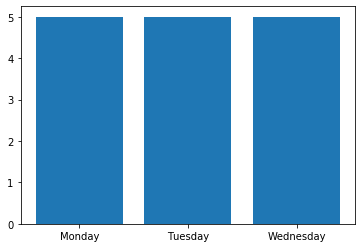

In [19]:
plt.bar(newdf['Day'], newdf['Count'])

In [22]:
newd1 = {'Day': ['Monday', 'Tuesday', 'Wednesday'], 'Count': [0,0,3]}
newdf1 = pd.DataFrame(newd1)

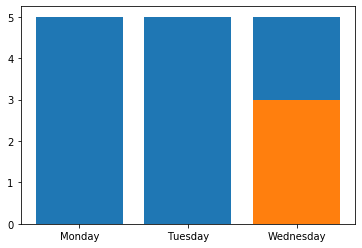

In [23]:
plt.bar(newdf['Day'], newdf['Count'])
plt.bar(newdf1['Day'], newdf1['Count'])
plt.show()